# Домашнее задание по теме «Построение гипотез. A/B тестирование. Автотестирование гипотез»

## Формулировка задания:
Подготовка к проведению A/B тестирования гипотезы

Для выполнения задания выполнить следующие шаги:
1. Найти данные для анализа (таблица csv, xlsx в открытом доступе)
2. Изучить данные (тема, типы столбцов, есть ли зависимость между столбцами)
3. Составить список гипотез по данным. Предположения :
- Зависимость столбцов по датам, времени и другим
критериям;
- Численный показатель или критерий оценки;
- Насколько есть разница в данных по выбранному
числовому критериям оценки
4. Выбрать одну из гипотез и подтвердить её или опровергнуть.
5. (Дополнительно) В качестве критериев выбрать статистические критерии. Например, критерий Стьюдента и др.

## Ожидаемый результат:
1. Файл с исходными данными;
2. Создан список гипотез по данным (примеры гипотез ниже);
3. Проверка гипотезы
4. Результат по гипотезе - подтверждение, опровержение и вывод
5. Расчеты в MS Excel, Colab/Jupiter notebook или python файл с проверкой выбранной гипотезы
6. (Дополнительно) Указан критерий проверки выбранной гипотезы;

## Примеры гипотез в области промышленности для проведения A/B тестирования
1. Добавление функции автоматической проверки качества на стадии производства увеличит производительность на 10%.
2. Оптимизация процесса производства с использованием роботизированных систем снизит затраты на 10%.
3. Обновление системы управления производством увеличит качество продукции на 20%.
4. Использование интеллектуальной системы принятия решений повысит производительность на 15%.
5. Увеличение доли устройств для автоматизации процессов производства повысит производительность на 20%.
6. Увеличение инвестиций в инструменты контроля качества продукции увеличит производительность на 25%.
7. Отказ от традиционных способов производства и переход на современные технологии увеличит качество продукции на 30%.
8. Использование машинного обучения и искусственного интеллекта для анализа данных повысит производительность на 15%.
9. Создание интегрированной системы управления снизит затраты на производство на 10%.
10. Использование программно-аппаратных средств для автоматической обработки данных увеличит производительность на 20%.

## Перечень инструментов, необходимых для реализации деятельности:
1) MS Excel

2) Colab/Jupiter notebook

3) PyCharm

## Релизация

[Выбранный dataset для анализа](https://www.kaggle.com/datasets/beaver68/cars-dataset-in-russia)

In [61]:
# подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

In [10]:
# загрузка данных
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [11]:
# посмотрим информацию по выборке
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [12]:
# проверим на пропуски
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### Датасет содержит информацию:
```markdown
Заголовок           | Название
--------------------|------------------------
longitude           | долгота
latitude            | широта
housing median age  | средний возраст жилья
total rooms         | всего комнат
total bedrooms      | всего спален
population          | население
households          | домохозяйства
median income       | средний доход
median house value  | средняя стоимость дома

```
### Исходя из данных датасета мы можем рассмотреть следующие вопросы:


1.   Существует ли положительная корреляция между средней стоимостью дома и среднем доходом
2.   Наблюдается ли зависимость между численностью населения и среднем возрастом жилья



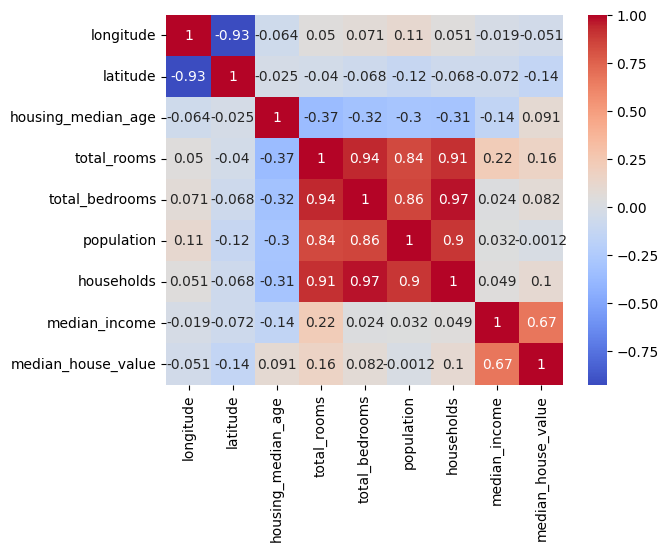

In [15]:
# потстроим матрицу корреляций
matrix_corr = df.corr();

# вывод корреляционной матрицы
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm');

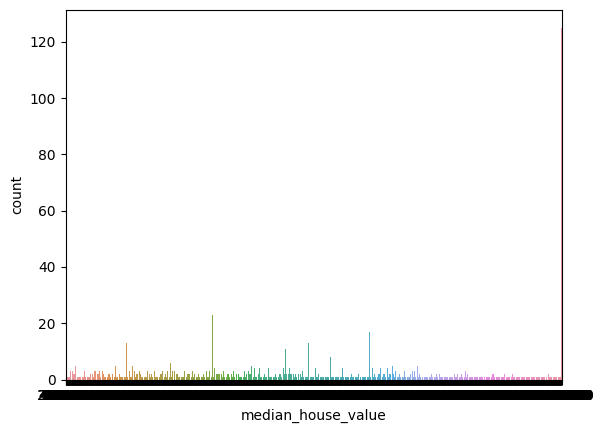

In [19]:
# рассмотрим диаграмму средней стоимости дома
fig = plt.subplots()
sns.countplot( x='median_house_value', data=df)
plt.show()

In [23]:
# из графика видим что анамально много записей относится к одной стоимости, выведем данные ко количеству с группировкой по нужному нам полю
df.groupby('median_house_value').count()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
median_house_value,,,,,,,,
22500.0,1,1,1,1,1,1,1,1
37500.0,1,1,1,1,1,1,1,1
39200.0,1,1,1,1,1,1,1,1
39800.0,1,1,1,1,1,1,1,1
40000.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
494700.0,1,1,1,1,1,1,1,1
495500.0,1,1,1,1,1,1,1,1
495800.0,1,1,1,1,1,1,1,1


In [31]:
# видим что к стоимости 500001 относится очень много записей, предполагаю что к этой записи относятся все дома что дороже 500000. Для корректного анализа удалим эти записи
df = df.loc[df['median_house_value'] != 500001]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2994,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0


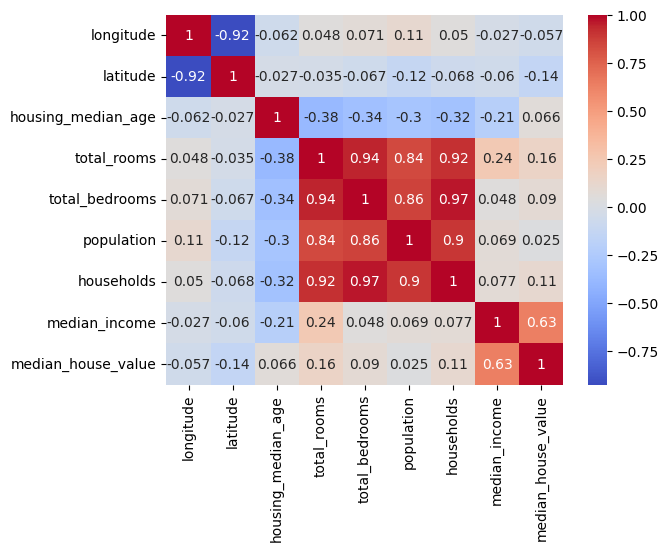

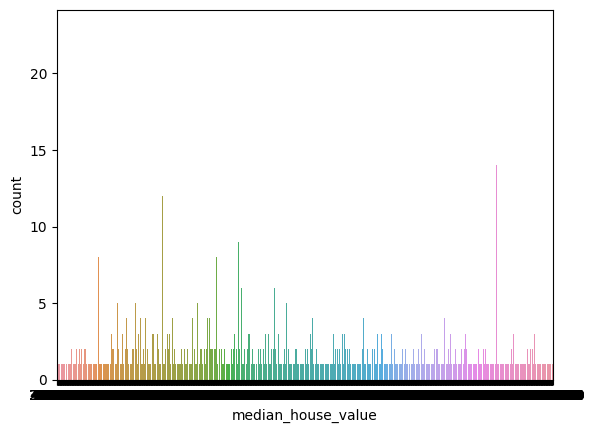

In [32]:
# повторно потстроим матрицу корреляций
matrix_corr = df.corr();

# вывод корреляционной матрицы
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm');

# рассмотрим диаграмму средней стоимости дома
fig = plt.subplots()
sns.countplot( x='median_house_value', data=df)
plt.show()

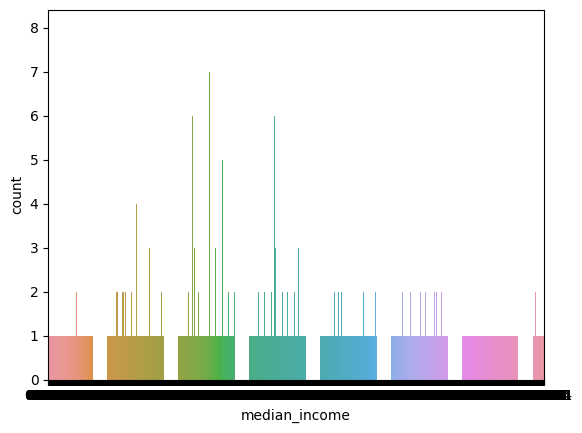

In [34]:
# рассмотрим диаграмму среднего дохода
fig = plt.subplots()
sns.countplot( x='median_income', data=df)
plt.show()

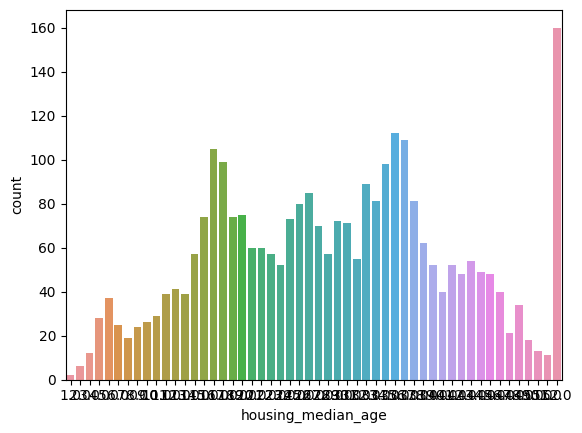

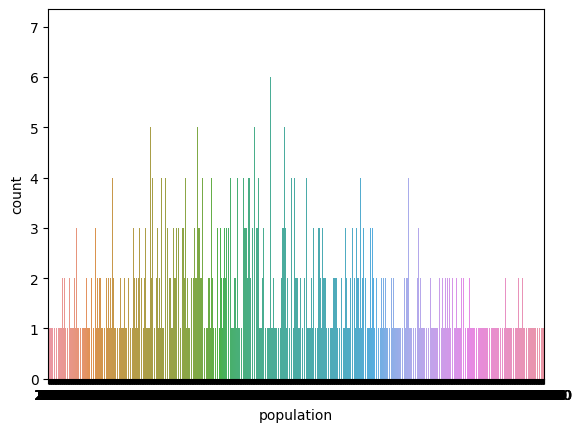

In [35]:
# рассмотрим диаграммы населения и среднего возраста жилья
fig = plt.subplots()
sns.countplot( x='housing_median_age', data=df)
plt.show()

fig = plt.subplots()
sns.countplot( x='population', data=df)
plt.show()

In [37]:
# как видим из графиков и выборки ниже, с возрастом жилья аналогичная ситуация с возрастом 52 - к нему отнесли все что старше или равно 52
df.groupby('housing_median_age').count()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,,,,,,,,
1.0,2,2,2,2,2,2,2,2
2.0,6,6,6,6,6,6,6,6
3.0,12,12,12,12,12,12,12,12
4.0,28,28,28,28,28,28,28,28
5.0,37,37,37,37,37,37,37,37
6.0,25,25,25,25,25,25,25,25
7.0,19,19,19,19,19,19,19,19
8.0,24,24,24,24,24,24,24,24
9.0,26,26,26,26,26,26,26,26


In [38]:
df = df.loc[df['housing_median_age'] != 52]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2994,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0


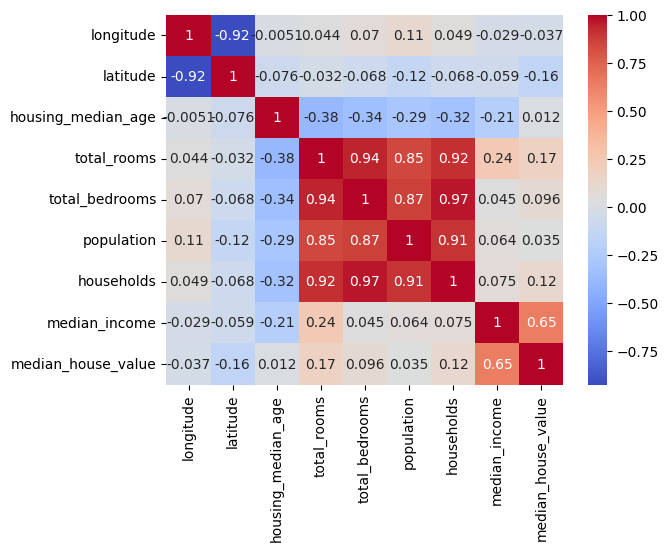

In [41]:
# повторно потстроим матрицу корреляций
matrix_corr = df.corr();

# вывод корреляционной матрицы
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm');

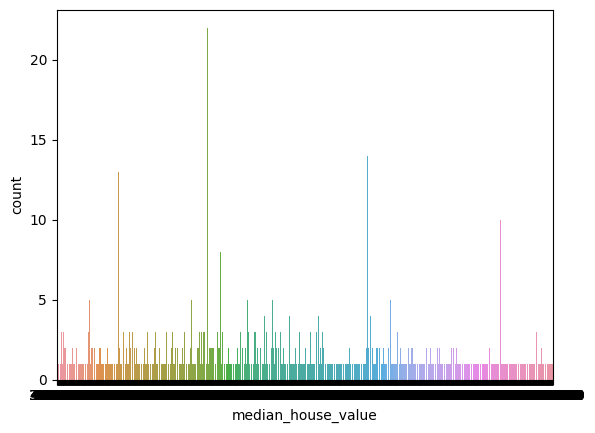

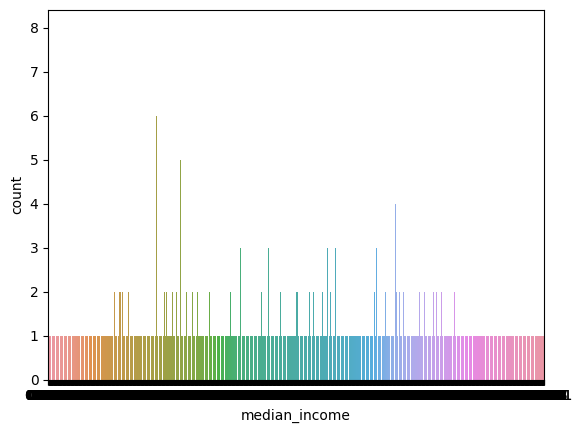

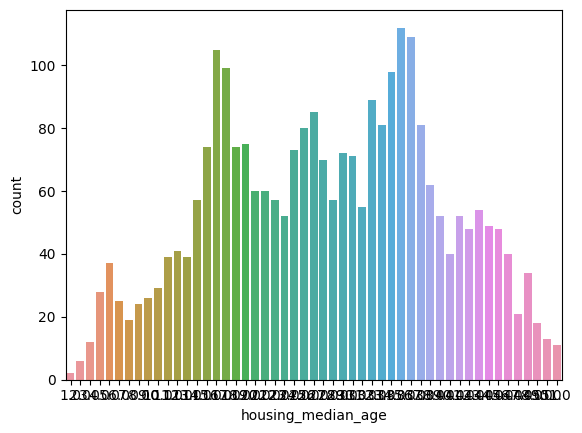

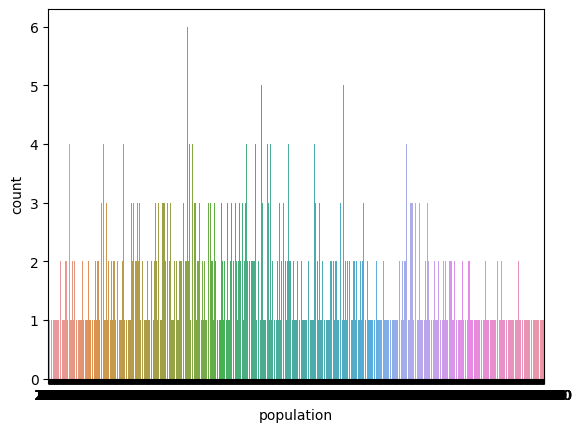

In [42]:
# рассмотрим диаграмму средней стоимости дома
fig = plt.subplots()
sns.countplot( x='median_house_value', data=df)
plt.show()

# рассмотрим диаграмму среднего дохода
fig = plt.subplots()
sns.countplot( x='median_income', data=df)
plt.show()

# рассмотрим диаграммы населения и среднего возраста жилья
fig = plt.subplots()
sns.countplot( x='housing_median_age', data=df)
plt.show()
fig = plt.subplots()
sns.countplot( x='population', data=df)
plt.show()

### Гипотеза №1
Средний уровень дохода влияет на среднюю стоимость жилья

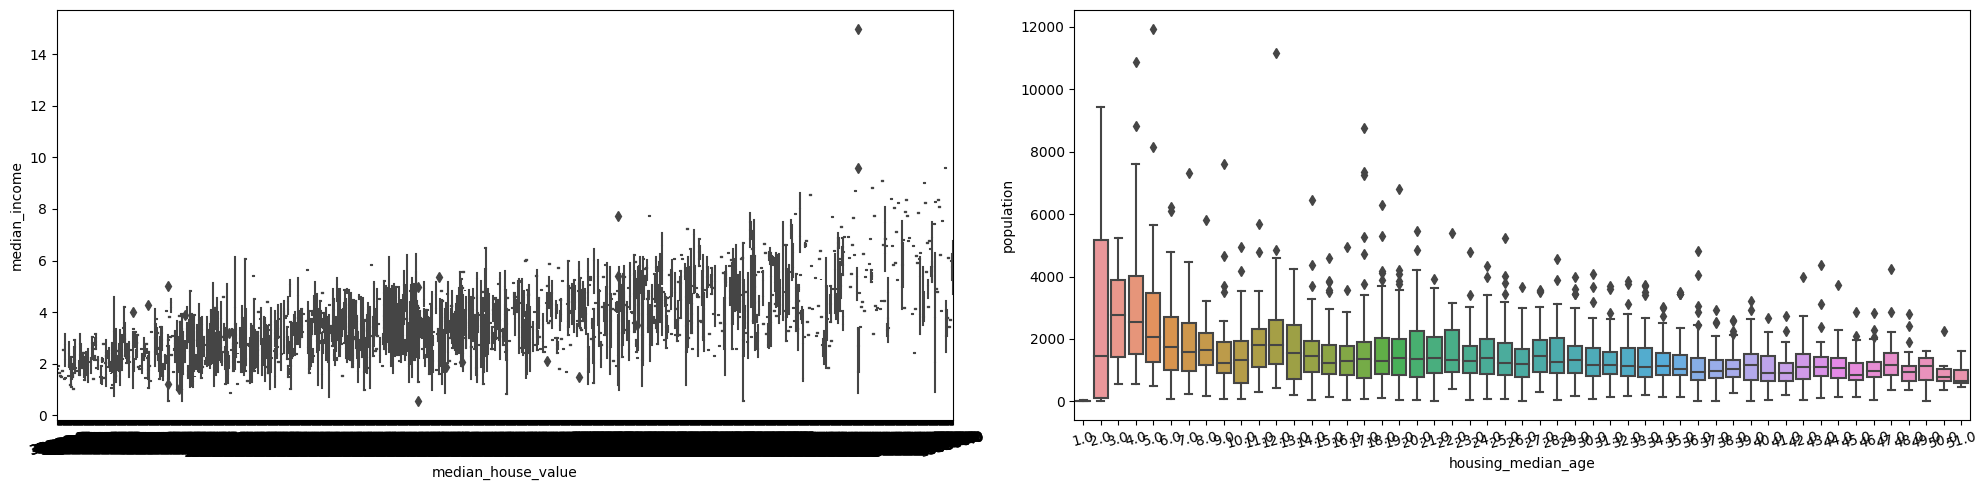

In [51]:
# рассмотрим показатели среднего уровня доходов относительно среднеей стоимости жилья
# и численности населения относительно среднего возраста жилья
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
sns.boxplot(ax=axes[0], x='median_house_value', y='median_income', data=df)
sns.boxplot(ax=axes[1], x='housing_median_age', y='population', data=df)
for i, ax in enumerate(fig.axes):
    axes[i].tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.show()

In [53]:
# вычисляем коэффициент корреляции Пирсона между среднем уровнем доходов и средней стоимостью жилья
corr0 = df['median_income'].corr(df['median_house_value']);

# выводим результаты
print(f'Корреляция между среднем уровнем доходов и средней стоимостью жилья: {corr0:.3f}')

Корреляция между среднем уровнем доходов и средней стоимостью жилья: 0.646


<Axes: xlabel='median_income', ylabel='median_house_value'>

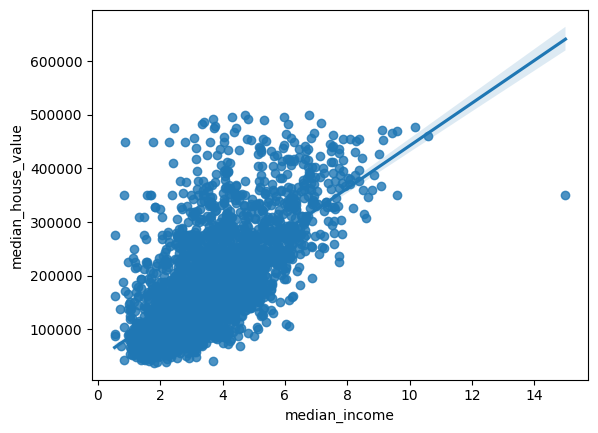

In [54]:
# строим график зависимости между среднем уровнем доходов и средней стоимостью жилья
sns.regplot(x='median_income', y='median_house_value', data=df)

In [ ]:
# коэффициент корреляции Пирсона составляет 0.646, что позволяет сделать вывод о наличии связи между переменными
# (среднем уровнем доходов и средней стоимостью жилья)
# гипотеза подтверждена

### Гипотеза №2
Численность населения влияет на средний возраст жилья

<Axes: xlabel='population', ylabel='housing_median_age'>

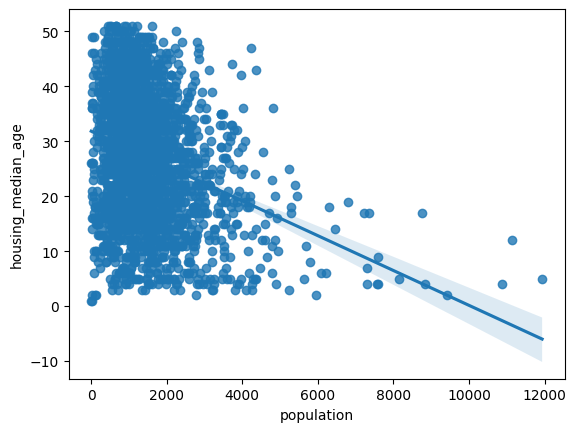

In [57]:
# строим график зависимости между численностью населения и среднем возрастом жилья
sns.regplot(x='population', y='housing_median_age', data=df)

In [58]:
# вычисляем коэффициент численностью населения и среднем возрастом жилья
corr0 = df['population'].corr(df['housing_median_age']);

# выводим результаты
print(f'Корреляция между численностью населения и среднем возрастом жилья: {corr0:.3f}')

Корреляция между численностью населения и возрастом домов: -0.288


In [ ]:
# коэффициент корреляции Пирсона составляет -0.288, что позволяет сделать вывод об отсутствие линейной связи между переменными
# (численность населения и средний возраст жилья)
# гипотеза не подтверждена

## Выводы
таким образом, в ходе анализа одна из двух гипотез потвердиласть.

**гипотеза №1:**  
Средний уровень дохода влияет на среднюю стоимость жилья - **ПОДТВЕРДИЛАСЬ**.  
для проверки данной гипотезы был использован метод Пирсона (его показатель составил 0.646) и графики корреляции, которые указывают на наличие линейной между рассматриваемыми переменными

**гипотеза №2:**  
Численность населения влияет на средний возраст жилья - **НЕ ПОДТВЕРДИЛАСЬ**.  
для проверки данной гипотезы был использован метод Пирсона (его показатель составил -0.288) и графики корреляции, которые указывают на отсутствие линейной связи между рассматриваемыми переменными

## Проверка статистических гипотез
для того чтобы убедиться что корреляция существует в более широкой выборке, сформулируем две гипотезы (нулевую и альтернативную)  
H0 - это гипотеза, что корреляция в выборке нулевая (т.е. что измеренная корреляция целиком вызвана случайной ошибкой при отборе)  
H1 - это гипотеза, что корреляция в выборке не нулевая (не определяем направление корреляции, а только что она существует)  


In [65]:
def t_statistic(xs, ys):
    '''Вычисление t-статистики'''
    r = xs.corr(ys)
    df = xs.count() - 2 # степень свободы для проверки корреляции
    return r * np.sqrt(df / 1 - r ** 2)

xs = df['median_income']
ys = df['median_house_value']
t_value = t_statistic(xs, ys)

dfn = xs.count() - 2
p = 2 * stats.t.sf(t_value, dfn)  # функция выживания
#Значение функции выживания соответствует p-значению для односторонней проверки

f't-значение {t_value} p-значение {p}'

't-значение 33.65921563574348 p-значение 7.38770670042481e-208'

### Вывод по проверке статистических гипотез
P-значение настолько мало, что в сущности равно 0, означая, что шанс, что  улевая гипотеза является истинной, фактически не существует. Мы вынуждены  ринять альтернативную гипотезу о существовании корреляции.

In [67]:
# дополнительно проверим интервал уверенности 95

def z_to_r(z):
    '''Преобразование z-оценки обратно в r-значение'''
    return (np.exp(z*2) - 1) / (np.exp(z*2) + 1)

def r_confidence_interval(crit, xs, ys):
    '''Расчет интервала уверенности
       для критического значения и данных'''
    r   = xs.corr(ys)
    n   = xs.count()
    zr  = 0.5 * np.log((1 + r) / (1 - r))
    sez = 1 / np.sqrt(n - 3)
    return (z_to_r(zr - (crit * sez))), (z_to_r(zr + (crit * sez)))

X = df['median_income']
y = df['median_house_value']
interval = r_confidence_interval(1.96, X, y)
f'Интервал уверенности (95%): {interval}'

# В результате получаем 95%-й интервал уверенности для ρ, расположенный между 0.623 и 0.667
# можем быть уверены в том, что в более широкой выборке существует достаточно сильная положительная корреляция

'Интервал уверенности (95%): (0.623815024068373, 0.6676547741909546)'